In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# import re

# Import the iris-train.txt data
Irist Training Set
2 lines per data record. Line 1 contains the training input (the feature descriptors,
sepal length, sepal width, petal length, and petal width of the plants), 
line 2 contains the desired output. The output (3 classes of the iris species) 
are encoded as (1 0 0) for class 1 (Setosa), (0 1 0 ) for class 2 (Versacolor) 
and (0 0 1) for class 3 (Virginica). The & at the beginning of the second 
line is a marker (should be skipped when reading in the data). 
 Sep_L  Sep_W  Pet_L  Pet_W Setosa Versacolor Virginica

# CHECK: https://stackoverflow.com/questions/13224362/principal-component-analysis-pca-in-python

In [3]:
with open('iris-train.txt', 'r') as reader:
    # Read & print the entire file
    d2 = reader.readlines()

In [97]:
num_list = []
input_data = []
desired_output = []
i = 0

with open('iris-train.txt', 'r') as fh:
    for line in fh:
        if i>7:
            element = line.replace('\n','') # Removes line spaces
            with_spaces = element.split('  ') # Splits the data
            # Removes blank entries
            no_spaces = [float(entry) for entry in with_spaces if entry != '' and entry != "&"]
                
            if i%2 == 0 : # An even line, then it is a train vector
                input_data.append(no_spaces)
                
            else: # An odd line, then it is the corresponding target vector
                desired_output.append(no_spaces)
                
        i += 1
        
input_data
# desired_output

[[0.224, 0.624, 0.067, 0.043],
 [0.749, 0.502, 0.627, 0.541],
 [0.557, 0.541, 0.847, 1.0],
 [0.11, 0.502, 0.051, 0.043],
 [0.722, 0.459, 0.663, 0.584],
 [0.776, 0.416, 0.831, 0.831],
 [0.196, 0.667, 0.067, 0.043],
 [0.612, 0.333, 0.612, 0.584],
 [0.612, 0.416, 0.812, 0.875],
 [0.055, 0.584, 0.067, 0.082],
 [0.557, 0.541, 0.627, 0.624],
 [0.165, 0.208, 0.592, 0.667],
 [0.027, 0.376, 0.067, 0.043],
 [0.639, 0.376, 0.612, 0.498],
 [0.667, 0.208, 0.812, 0.71],
 [0.306, 0.71, 0.086, 0.043],
 [0.196, 0.0, 0.424, 0.376],
 [0.612, 0.502, 0.694, 0.792],
 [0.137, 0.416, 0.067, 0.0],
 [0.471, 0.082, 0.51, 0.376],
 [0.694, 0.416, 0.761, 0.831],
 [0.416, 0.831, 0.035, 0.043],
 [0.361, 0.376, 0.439, 0.498],
 [0.416, 0.333, 0.694, 0.957],
 [0.306, 0.792, 0.051, 0.125],
 [0.361, 0.416, 0.592, 0.584],
 [0.612, 0.416, 0.761, 0.71],
 [0.388, 0.749, 0.118, 0.082],
 [0.529, 0.082, 0.592, 0.584],
 [0.945, 0.251, 1.0, 0.918],
 [0.306, 0.584, 0.118, 0.043],
 [0.443, 0.502, 0.643, 0.459],
 [0.722, 0.502, 0.796

In [66]:
sepal_length = [input_data[i][0] for i in range(len(input_data))]
sepal_width  = [input_data[i][1] for i in range(len(input_data))]
petal_length = [input_data[i][2] for i in range(len(input_data))]
petal_width  = [input_data[i][3] for i in range(len(input_data))]

# Preprocessing for having a zero mean in each column
sepal_length = sepal_length - np.mean(sepal_length)
sepal_width = sepal_width - np.mean(sepal_width)
petal_length = petal_length - np.mean(petal_length)
petal_width = petal_width - np.mean(petal_width)

# 10^{-17} is an error small enough which can be considered to be zero.
print(np.mean(sepal_length))
print(np.mean(sepal_width))
print(np.mean(petal_length))
print(np.mean(petal_width))

-5.440092820663267e-17
-8.104628079763643e-17
4.884981308350689e-17
8.881784197001253e-17


In [99]:
preprocessed_input_data = [[sepal_length[i], sepal_width[i], petal_length[i], petal_width[i]] for i in range(len(input_data))]
preprocessed_input_data

[[-0.2034933333333334,
  0.18057333333333325,
  -0.4032933333333333,
  -0.4198799999999999],
 [0.3215066666666666,
  0.058573333333333255,
  0.15670666666666672,
  0.07812000000000013],
 [0.12950666666666666, 0.09757333333333329, 0.3767066666666667, 0.53712],
 [-0.3174933333333334,
  0.058573333333333255,
  -0.4192933333333333,
  -0.4198799999999999],
 [0.2945066666666666,
  0.015573333333333272,
  0.19270666666666675,
  0.12112000000000006],
 [0.34850666666666663,
  -0.027426666666666766,
  0.3607066666666667,
  0.36812000000000006],
 [-0.23149333333333338,
  0.2235733333333333,
  -0.4032933333333333,
  -0.4198799999999999],
 [0.1845066666666666,
  -0.11042666666666673,
  0.1417066666666667,
  0.12112000000000006],
 [0.1845066666666666,
  -0.027426666666666766,
  0.34170666666666677,
  0.4121200000000001],
 [-0.3724933333333334,
  0.14057333333333322,
  -0.4032933333333333,
  -0.3808799999999999],
 [0.12950666666666666,
  0.09757333333333329,
  0.15670666666666672,
  0.161120000000000

In [125]:
c1 = []
c2 = []
c3 = []

for i in range(len(desired_output)):
    
    if desired_output[i][0] == 1: # Class 1 Setosa
        c1.append(preprocessed_input_data[i])
    
    elif desired_output[i][1] == 1: # Class 2 Versacolor    
        c2.append(preprocessed_input_data[i])
    
    elif desired_output[i][2] == 1: # Class 3 Virginica        
        c3.append(preprocessed_input_data[i])
    
    else:
        print("There was a mistake, could not find right class")
        
c1 = np.asarray(c1)
c2 = np.asarray(c2)
c3 = np.asarray(c3)

# BUT WAIT, WE NEEDED TO DIVIDE THIS DATA IN TRAINING AND TEST DATA! And the permutations should be on the classes, not on the whole dataset.

The train and test data will be divided in half, based on each of the classes size.

In [129]:
permute_c1 = np.random.permutation(c1)
train_c1 = [permute_c1[i] for i in range(round(len(c1)/2))]
test_c1 = [permute_c1[i+round(len(c1)/2)] for i in range(len(c1)-len(train_c1))]

permute_c2 = np.random.permutation(c2)
train_c2 = [permute_c2[i] for i in range(round(len(c2)/2))]
test_c2 = [permute_c2[i+round(len(c2)/2)] for i in range(len(c2)-len(train_c2))]

permute_c3 = np.random.permutation(c3)
train_c3 = [permute_c3[i] for i in range(round(len(c3)/2))]
test_c3 = [permute_c3[i+round(len(c3)/2)] for i in range(len(c3)-len(train_c3))]

In [130]:
# Now, we want to combine all the test in the same vector, as well as their corresponging desired outputs.
desired_output_test_c1 = [[1, 0, 0] for i in range(len(test_c1))]
desired_output_test_c2 = [[0, 1, 0] for i in range(len(test_c2))]
desired_output_test_c3 = [[0, 0, 1] for i in range(len(test_c3))]

desired_output_train_c1 = [[1, 0, 0] for i in range(len(train_c1))]
desired_output_train_c2 = [[0, 1, 0] for i in range(len(train_c2))]
desired_output_train_c3 = [[0, 0, 1] for i in range(len(train_c3))]

concat_train = np.concatenate([train_c1, train_c2, train_c3])
concat_train_desired_outputs = np.concatenate([desired_output_train_c1, desired_output_train_c2, desired_output_train_c3])

concat_test = np.concatenate([test_c1, test_c2, test_c3])
concat_test_desired_outputs = np.concatenate([desired_output_test_c1, desired_output_test_c2, desired_output_test_c3])

# And then permute this and feed it to the ANN
indices_train = [i for i in range(len(concat_train))]
permute_train_i = np.random.permutation(indices_train)

train_input = np.asarray([concat_train[permute_train_i[i]] for i in range(len(permute_train_i))])
train_desired_output = [concat_train_desired_outputs[permute_train_i[i]] for i in range(len(permute_train_i))]

indices_test = [i for i in range(len(concat_test))]
permute_test_i = np.random.permutation(indices_test)

test_input = np.asarray([concat_test[permute_test_i[i]] for i in range(len(permute_train_i))])
test_desired_output = [concat_train_desired_outputs[permute_train_i[i]] for i in range(len(permute_train_i))]

In [131]:
print(len(train_c3))
print(len(test_c3))
print(len(c3))

12
13
25


In [80]:
pca = PCA()
pca.fit(preprocessed_input_data.T)

PCA()

In [86]:
eigenvectors = pca.components_
print("The 4 principal eigenvectors")
print(eigenvectors)

The 4 principal eigenvectors
[[ 0.39957069 -0.1953196   0.61184299  0.65409607]
 [-0.43304502 -0.89878279  0.04789885 -0.04865398]
 [-0.74353538  0.32481948 -0.03451457  0.58348623]
 [-0.31618098  0.22029993  0.78877284 -0.47888927]]


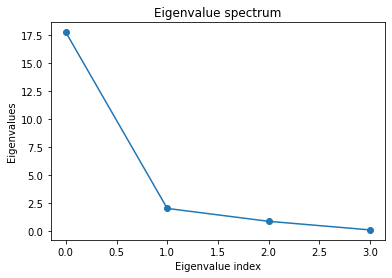

In [85]:
plt.plot(pca.singular_values_**2, marker="o") # Note: eigenvalues are the singular values squared
plt.title("Eigenvalue spectrum")
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalues")
plt.show()

In [90]:
# Note how the eigenvector matrix times its transpose is the identity.
np.round(np.matmul(eigenvectors, eigenvectors.T))

array([[ 1.,  0., -0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [-0.,  0.,  1., -0.],
       [ 0.,  0., -0.,  1.]])

In [ ]:
1. Standarize the data
2. Covariance matrix
3. Eigenvectors
4. Eigenvector matrix

# Exercise 2.2
Write a function to implement eq. 10.21 in L10-Unsupervised (pdf 20). The Generalized Hebbian Algorithm which only has elements in the lower diagonal:
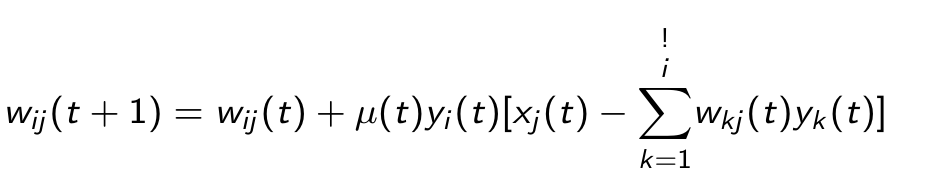

In [ ]:
# Implement the generalized Hebbian algorithm

lr = 0.005 # Learning rate, could also try 0.0001
# We need 4 input PEs
# Also need 1 ouptut PE which will then be 4 PEs
# We have a matrix of weights which connect the input PEs to the output PEs
# Use only 1 output PE and that output should be the first eigenvector.


multiplication = wkj*yk # But this multiplication is only of the lower triangle matrix
wij_next = wij + lr*yi*(xj - np.sum(multiplication))

# Why don't you try little by little. Make 2 for loops, for iterating each matrix element. And applying the corresponding update rule in case the element is on or below the diagonal.

In [119]:
# Generalized Hebbian algorithm, modified from Anastasia Makarevich
# https://rstudio-pubs-static.s3.amazonaws.com/248389_27c0ad59e4eb4f0a9117e5044c12a86a.html

def trainNetwork(Xnorm,n_components,eta):
        # initialize
        X_columns, n_features = Xnorm.shape[0], Xnorm.shape[1] # nrow, ncol(Xnorm)        
        epochs = 10000 # Elevate to the 4th power?
        z = epochs*X_columns
        # Initializes weight matrix with normalized random values between -1 and 1
        W = np.random.rand(n_components, n_features)*2 # row, column # COULD BE WRONG, CHECK!
        # SHould the weight matrix be normalized?
        
        Y = np.zeros(1, n_components)
        
        # train
        for for n in range(z):
            ind = n%%(n_obs)+1 # What does this symbol mean?
            for j in range(n_components):
                Y[ind,j] = W[j,]%*%Xnorm[ind,]
                W[j,] = W[j,]+eta*(Y[ind,j]*Xnorm[ind,]-Y[ind,j]*(Y[ind,1:j]%*%W[1:j,]))
                    
        return Y, W #(data = Y, pc = W)

SyntaxError: invalid syntax (1250775022.py, line 4)

In [137]:
train_input.shape[0]

36

In [ ]:
eta = 0.005 # Learning rate, could also try 0.0001
results = trainNetwork(train,4,eta) # use centered data
W = results$pc
Y = results$data

In [ ]:
# Principal components
print(W)

In [ ]:
# Compare to PCA